# Scraping using Beautiful Soup

You'll remember that a library is a collection of recipes (functions) and other stuff that someone has created for a particular type of problem. 

Scraping involves a few different problems:

1. Fetching the document (the webpage) from a URL
2. Drilling down into that document (parsing) to grab the particular information we want
3. Saving that information in some form we can export, e.g. a dataframe

We need a different library for each: 

* `requests` for fetching webpages
* `BeautifulSoup` for drilling into them
* `pandas` for storing the resulting data

Let's import those then.

In [1]:
#import requests for fetching webpages
import requests

In [2]:
#import beautiful soup - note the capitals
from bs4 import BeautifulSoup

In [3]:
#import pandas for storing the data
import pandas as pd

### What is this `import from` business?

You might be wondering why the command to import `BeautifulSoup` is different to the rest. Why do we not write 'import BeautifulSoup'?

This is what happens when you try to do that...

In [ ]:
#try to import 'BeautifulSoup' - we'll get a ModuleNotFoundError
import BeautifulSoup

ModuleNotFoundError: ignored

### The Beautiful Soup library is actually called `bs4`

The cause of the error is this: although we talk about the Beautiful Soup library, when imported the library is called `bs4` (short for Beautiful Soup 4).

So if we try to import `BeautifulSoup` we get a `ModuleNotFoundError` - Python can't find that module (library) because it doesn't exist with that name.

So we *could* import the library like this:

In [ ]:
#import the bs4 library 
import bs4

### We only import the `BeautifulSoup` function

...but we don't. Instead we wrote `from bs4 import BeautifulSoup`

What is happening here?

Sometimes you don't want to import a whole library, but [only one *part* of it](https://stackoverflow.com/questions/57113941/python-importing-modules-and-libraries).

In this case, we only want *one function* from the `bs4` library: `BeautifulSoup` (yes, this is confusing).

If we just imported `bs4` then to use that function we would be writing `bs4.BeautifulSoup()` each time. 

Here's some code showing how that will look - you will see the simpler version later. 

```
bs4.BeautifulSoup(page.content, 'html.parser')
```

But because we *only* want to use this *one* function from `bs4`, we can choose instead to *just* import that function.

So, `from bs4 import BeautifulSoup` means import that one function from `bs4` - and it also means we don't have to specify the library when we use the function. We can just write this:

```
BeautifulSoup(page.content, 'html.parser')
```

And it will know which library it's taking that function from.

Now that that's explained, let's get on with scraping a webpage.

## Fetching a webpage using `requests`

The `requests` library has a function called `get()` which will fetch a document from a URL. 

*Note: I use the term 'document' because although most URLs point to webpages  - i.e. HTML documents - some might point to Excel spreadsheets or CSVs or PDFs or other documents, and we can use this to fetch those too. *

Here we fetch the HTML document at https://www.bbc.co.uk/news (the BBC News homepage) and store it in a variable called 'page'.

In [4]:
#fetch a page from a URL
page = requests.get("https://www.bbc.co.uk/news")
#show the resulting object
page

<Response [200]>

### The `requests` 'object'

When we try to show the resulting variable, we get something in triangular brackets: `<Response [200]>`

The triangular brackets (chevrons) are a good indication that it's some sort of 'object' that will need translating/decoding - typically by calling on some **attribute** of the object.

With `requests` objects, the most useful attribute is `.content`.

b'<!DOCTYPE html>\n<html lang="en-GB" class="b-pw-1280 b-reith-sans-font no-touch" id="responsive-news">\n<head>\n    <meta charset="utf-8">\n    <meta name="viewport" content="width=device-width, initial-scale=1, user-scalable=1">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\n    <meta name="google-site-verification" content="Tk6bx1127nACXoqt94L4-D-Of1fdr5gxrZ7u2Vtj9YI">\n    <link href="//static.bbc.co.uk" rel="preconnect" crossorigin>\n    <link href="//m.files.bbci.co.uk" rel="preconnect" crossorigin>\n    <link href="//nav.files.bbci.co.uk" rel="preconnect" crossorigin>\n    <link href="//ichef.bbci.co.uk" rel="preconnect" crossorigin>\n    <link rel="dns-prefetch" href="//mybbc.files.bbci.co.uk">\n    <link rel="dns-prefetch" href="//ssl.bbc.co.uk/">\n    <link rel="dns-prefetch" href="//sa.bbc.co.uk/">\n    <link rel="dns-prefetch" href="//ichef.bbci.co.uk">\n\n\n    <link rel="preload" as="style" href="//m.files.bbci.co.uk/modules/bbc-morph-news-page-styl
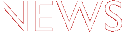

In [ ]:
#show the content
page.content

Now we can see the actual *content* of the HTML document that was fetched. 

A quick google should help you find [other properties and methods of a requests object](https://www.w3schools.com/python/ref_requests_response.asp), such as `.text` or `.status_code` (whether the request was successful or not). 

You could try those out by writing `page.text` or `page.status_code`

## Turning that object into a beautiful 'soup'

Next we need to turn that into a Beautiful Soup object - a 'soup' - so we can drill down further into the information that it contains. 

To do that we use the `BeautifulSoup` function. This needs two ingredients: 

* The page content (which we obtained with `page.content`)
* And the 'parser' you want to use on it

A 'parser' is something that can drill down into (parse) the parts of a particular type of language.

Which parser you use will depend on the type of document being fetched. In this case we fetched a HTML document, so it would make sense to specify a HTML parser. 

But you could also use other parsers. For example BeautifulSoup's documentation [section on parsers recommends](https://www.crummy.com/software/BeautifulSoup/bs4/doc/#installing-a-parser) the lxml parser: 

> "If you can, I recommend you install and use lxml for speed."

This is [supported by tests](https://www.crummy.com/2012/01/22/0) done on the different parsers, where the LXML parser comes out not only as faster, but also more successful.

The parser is given as a **string**, after the page content and a comma, as a second ingredient. The code to create a Beautiful Soup object using the lxml parser is:

```
soup = BeautifulSoup(page.content, 'lxml')
```

And the code to create a Beautiful Soup object using the HTML parser is:

```
soup = BeautifulSoup(page.content, 'html.parser')
```

Below, then, we write some code to turn that page into a soup object.

<!DOCTYPE html>

<html class="b-pw-1280 b-reith-sans-font no-touch" id="responsive-news" lang="en-GB">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1, user-scalable=1" name="viewport"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="Tk6bx1127nACXoqt94L4-D-Of1fdr5gxrZ7u2Vtj9YI" name="google-site-verification"/>
<link crossorigin="" href="//static.bbc.co.uk" rel="preconnect"/>
<link crossorigin="" href="//m.files.bbci.co.uk" rel="preconnect"/>
<link crossorigin="" href="//nav.files.bbci.co.uk" rel="preconnect"/>
<link crossorigin="" href="//ichef.bbci.co.uk" rel="preconnect"/>
<link href="//mybbc.files.bbci.co.uk" rel="dns-prefetch"/>
<link href="//ssl.bbc.co.uk/" rel="dns-prefetch"/>
<link href="//sa.bbc.co.uk/" rel="dns-prefetch"/>
<link href="//ichef.bbci.co.uk" rel="dns-prefetch"/>
<link as="style" href="//m.files.bbci.co.uk/modules/bbc-morph-news-page-styles/2.4.9/enhanced.css" rel="preload"/>
<script type="text/java
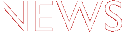

In [5]:
#use that content as an ingredient in the BeautifulSoup function
soup = BeautifulSoup(page.content, 'html.parser')
#show the resulting object
soup

### What is the 'soup'?

The documentation for Beautiful Soup describes the object it creates quite succinctly:

> "Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. But you’ll only ever have to deal with about four kinds of objects: Tag, NavigableString, BeautifulSoup, and Comment."

Specifically, we'll normally be intersted in those Tag objects. These can be accessed by specifying the tag that you want (or other qualities such as the tag attributes)...



## Drilling down into the 'soup': `.title` and other tags

We can fetch the `<title>` tag from the HTML by using the `.title` attribute of a Beautiful Soup object.

In [ ]:
#show the page title
soup.title

<title>Home - BBC News</title>

That title itself has further attributes: the tag itself, and the string of text it contains. 

These can also be accessed through further attributes `.name` (the name of the tag) and `.string`

In [ ]:
#show the page title tag name
print(soup.title.name)
#show the string inside the page title tag
print(soup.title.string)

title
Home - BBC News


The same approach can be used to find any other tags that are in the page - by calling them as an attribute. 

In [ ]:
#print a <h2>
print(soup.h2)
#print a <a> tag (link)
print(soup.a)
#print a <p> tag
print(soup.p)

<h2>Accessibility links</h2>
<a href="https://www.bbc.co.uk" id="homepage-link">Homepage</a>
<p style="position: absolute; top: -999em"><img alt="" height="1" src="https://a1.api.bbc.co.uk/hit.xiti?&amp;col=1&amp;from=p&amp;ptag=js&amp;s=598253&amp;p=news.page&amp;x1=[urn:bbc:cps:b5c53243-a695-e059-e040-850a02846523]&amp;x2=[responsive]&amp;x3=[bbc_website]&amp;x4=[en]&amp;x7=[index-home]&amp;x8=[reverb-3.3.0-nojs]&amp;x11=[news_gnl]&amp;x12=[news]" width="1"/></p>


## Grabbing tags with `.select()`

You'll notice that in each case we only see *one* result - but surely there's more than one link, more than one paragraph, and more than one h2 heading?

In those examples we will only be shown the *first* match. 

Instead, then, we need to select *all* matches. To do this we can use `.select()` with one ingredient: a **CSS selector** describing the tag that we want to target.

CSS selectors are used in web design to add style to HTML (the CSS stands for Cascading Style Sheets). They do this by 'targeting' a particular HTML tag in order to apply a style to it. For example, it might target headings and specify that they should be styled to be bold, charcoal grey, and 18 pixels high. 

They basically look the same as a tag, but without the triangular brackets (chevrons). For example, the selector for a `<h2>` tag is simply `h2`.

This is how we might target *all* `<h2>` tags in our 'soup'...

In [ ]:
soup.select('h2')

[<h2>Accessibility links</h2>,
 <h2 class="gs-u-vh">News Navigation</h2>,
 <h2 class="nw-c-breaking-news-banner__h2 gel-paragon-bold"><span aria-hidden="true">Breaking</span><span class="gs-u-vh">Breaking news</span></h2>,
 <h2 class="gs-u-vh">Top Stories</h2>,
 <h2 class="gel-double-pica-bold" id="nw-c-cluster2-heading__title">Ukraine crisis</h2>,
 <h2 class="gel-double-pica-bold" id="nw-c-must-see-heading__title">Must see</h2>,
 <h2 class="gel-double-pica-bold" id="nw-c-most-watched-heading__title">Most watched</h2>,
 <h2 class="gel-double-pica-bold" id="nw-c-full-story-heading__title">Full story</h2>,
 <h2 class="gel-double-pica-bold" id="nw-c-cluster3-heading__title">Winter Olympics</h2>,
 <h2 class="gel-double-pica-bold" id="nw-c-most-read-heading__title" tabindex="-1">Most read</h2>,
 <h2 class="gel-double-pica-bold" id="nw-c-around-the-bbc-heading__title">Around the BBC</h2>,
 <h2 class="gel-double-pica-bold" id="nw-c-sport-heading__title">Sport</h2>,
 <h2 class="gel-double-pica

### The result is a list

You'll notice that the results are contained within square brackets - which is a strong clue this is a list, and can be *looped through*.

To check that, store the results in a variable, and then loop through that. 

In [6]:
#store the matches in a list variable called 'h2s'
h2s = soup.select('h2')
#show how many items
print(len(h2s))
#show the first item
print(h2s[0])
#loop through that 
for i in h2s:
  #print the item
  print(i)
  #print the text 
  print(i.string)

15
<h2>Accessibility links</h2>
<h2>Accessibility links</h2>
Accessibility links
<h2 class="gs-u-vh">News Navigation</h2>
News Navigation
<h2 class="nw-c-breaking-news-banner__h2 gel-paragon-bold"><span aria-hidden="true">Breaking</span><span class="gs-u-vh">Breaking news</span></h2>
None
<h2 class="gs-u-vh">Top Stories</h2>
Top Stories
<h2 class="gel-double-pica-bold" id="nw-c-cluster2-heading__title">Ukraine crisis</h2>
Ukraine crisis
<h2 class="gel-double-pica-bold" id="nw-c-must-see-heading__title">Must See</h2>
Must See
<h2 class="gel-double-pica-bold" id="nw-c-most-watched-heading__title">Most watched</h2>
Most watched
<h2 class="gel-double-pica-bold" id="nw-c-full-story-heading__title">Full Story</h2>
Full Story
<h2 class="gel-double-pica-bold" id="nw-c-cluster3-heading__title">Winter Olympics</h2>
Winter Olympics
<h2 class="gel-double-pica-bold" id="nw-c-most-read-heading__title" tabindex="-1">Most read</h2>
Most read
<h2 class="gel-double-pica-bold" id="nw-c-around-the-bbc-hea

The key line here is `h2s = soup.select('h2')`

Let's break that down. 

1. `h2s =` - creates a new variable called `h2s` which is going to be used to store whatever comes after that equals sign.
2. Then we come to `soup` - that's the variable that was created in a previous line, when we converted our HTML webpage into a special object. This special object allows us to use...
3. ...the `.select()` method (basically a function), which is joined to `soup` with a period: `souo.sselect()`
4. Finally, in parentheses after the `cssselect` method is the **selector(s)** that we want to target: `('h2')`

There's a lot going on there, but the key thing to remember is that *you don't need to change any of this code* apart from the selector in parentheses at the end. 

At the moment this selector is `'h2'` which means it will select any `<h2>` tags in the webpage that was scraped (in this case the BBC home page). But we'll go more into selectors in a moment.

Oh, and also in the output from the code we can see the results of the `print` commands: 

* first, printing the results of using the `len` function on that variable - or `len(h2s)` - tells us how many items are in that list.
* second, we print the first item - index 0 - in that list by putting the index in square brackets after the list name: `h2s[0]`
* then, inside the loop, we print each item from that list (`i`), and the *string attribute* of that item (`i.string`)

## Getting text: the difference between `.string` and `.get_text()`

If you looked closely, you might notice that one of the items didn't return any text when we use `.string`

In [ ]:
#show the second item 
print(h2s[2])
print(h2s[2].string)

<h2 class="nw-c-breaking-news-banner__h2 gel-paragon-bold"><span aria-hidden="true">Breaking</span><span class="gs-u-vh">Breaking news</span></h2>
None


Why? Well, because `.string` only looks for the string of text between the tag selected *and the next tag* - regardless of what the next tag is. 

In this case the `<h2>` tag is immediately followed by a `<span>` tag before the heading text ("Breaking").

But another attribute - `.get_text()` - *will* fetch this: this attribute looks for *all* the text contained in the specified tag *and any child tags*.

In [ ]:
#show the second item 
print(h2s[2])
print(h2s[2].string)
print(h2s[2].get_text())

<h2 class="nw-c-breaking-news-banner__h2 gel-paragon-bold"><span aria-hidden="true">Breaking</span><span class="gs-u-vh">Breaking news</span></h2>
None
BreakingBreaking news


In fact in this case there are two sets of text inside two `<span>` tags for this heading.

Here's that HTML broken across multiple lines and indented so you can better see how it's structured and why those two strings are smashed together when they're extracted.

```
<h2 class="nw-c-breaking-news-banner__h2 gel-paragon-bold">
  <span aria-hidden="true">Breaking</span>
  <span class="gs-u-vh">Breaking news</span>
</h2>
```



## Storing text from the matches: `.append()`

Being able to get text from one match is one thing - but how do we create a *list* of *all* matches?

To do that we need to:

1. Create a new empty list variable to store our text matches
2. Loop through each match, 
3. Extract the text, and 
3. Add it to that new list. 

Creating a new list variable is the same as creating any list variable - you use square brackets to indicate it's a list. An empty list variable just leaves those brackets empty, like this:

```
headlines = []
```

You can add items to a list (whether it's empty or not) by attaching `.append()` to the name of the list. So if we wanted to add the string "hello" to our list we could do that with this code:

```
headlines.append("hello")
```

This can be especially useful in a loop. 

Each time we extract the text from our tag match, we can append it to that list.

So: 

* The first time the loop runs (on the first item in the list), it will add the text from that first item to the list. Now the list is no longer empty: it's got one item in it
* The second time it runs (on the second item), it will add *that* text to the list. Now the list has two items. 
* And so on. Another item is appended to the list each time the loop runs. When the loop finishes, the new list will have as many items in it as there were in the list that was being looped through.

Let's see that in action:

In [ ]:
#create an empty list
headlines = []
#loop through the h2 matches
for i in h2s:
  #extract the text for that h2
  h2text = i.get_text()
  #print it
  print(h2text)
  #add it to the list
  headlines.append(h2text)

#print the final list
print(headlines)

Accessibility links
News Navigation
BreakingBreaking news
Top Stories
Ukraine crisis
Must see
Most watched
Full story
Winter Olympics
Most read
Around the BBC
Sport
Find us here
News Navigation
Explore the BBC
['Accessibility links', 'News Navigation', 'BreakingBreaking news', 'Top Stories', 'Ukraine crisis', 'Must see', 'Most watched', 'Full story', 'Winter Olympics', 'Most read', 'Around the BBC', 'Sport', 'Find us here', 'News Navigation', 'Explore the BBC']


## Grabbing links and other tag attribute values

To grab a link you might consider specifying that you want to find all `'a'` tags - and you'd be right.

In [ ]:
#find all links (<a href> tags)
links = soup.select('a')
#show the first
print(links[0])

<a href="https://www.bbc.co.uk" id="homepage-link">Homepage</a>


### Accessing attributes and values of tags

But with links you might not just want the text - you might want the URL that's being linked to as well.

That URL is the *value* of the *href=* attribute of the tag. To grab *that* you use the same approach as with a dictionary - but treating the attribute as a **key**.

In [ ]:
#show the href = value
print(links[0]['href'])
#show the id= value
print(links[0]['id'])

https://www.bbc.co.uk
homepage-link


### Finding out what attributes a tag has: `.attrs`

You can find out what attributes a tag has by using `.attrs`

In [ ]:
#show the attributes of the item
print(links[0].attrs)

{'href': 'https://www.bbc.co.uk', 'id': 'homepage-link'}


## Specifying *combinations* of tags

Often we want to be more specific, and describe a combination of tags, such as 'all links within paragraphs' or 'all h2 tags within a div tag'.

CSS selectors allow you specify combinations of tags by putting them together in the order that you expect them to be used, separated by a space. 

For example, to describe 'a link within a paragraph' you would use the selector `p a` (a `<p>` tag followed by an `<a>` tag). 

Here, then, we describe 'any `<span>` tag within a `<h2>` tag':

In [ ]:
#grab span tags within h2 tags
soup.select('h2 span')

[<span aria-hidden="true">Breaking</span>,
 <span class="gs-u-vh">Breaking news</span>]

This grabs the two that we had spotted - and only those. So those turn out to be the only instances where there's a `<span>` within the heading. 

This can be especially important with links. If we were to grab all links, for example, we'd be grabbing navigation links, links in the footers, and so on. 

In [ ]:
#grab all links
links = soup.select('a')
#count how many matches we got
len(links)

286

So instead it's likely we'll want to specify links *in a particular place*, such as in headings, or paragraph text.

In [ ]:
#grab all links inside <p> tags
links = soup.select('p a')
#how many matches this time?
len(links)

4

## Specifying attributes of tags we want to grab

Sometimes it's not a combination of tags that helps us narrow down what we want to grab - instead it's some *attribute* of the tag.

A common example is the `class=` attribute - this is often added to HTML tags by web designers so that they can be styled differently. 

Look at those h2 tags again to see how different headings have different `class=` attributes (and some have none).

In [ ]:
soup.select('h2')

[<h2>Accessibility links</h2>,
 <h2 class="gs-u-vh">News Navigation</h2>,
 <h2 class="nw-c-breaking-news-banner__h2 gel-paragon-bold"><span aria-hidden="true">Breaking</span><span class="gs-u-vh">Breaking news</span></h2>,
 <h2 class="gs-u-vh">Top Stories</h2>,
 <h2 class="gel-double-pica-bold" id="nw-c-cluster2-heading__title">Ukraine crisis</h2>,
 <h2 class="gel-double-pica-bold" id="nw-c-must-see-heading__title">Must see</h2>,
 <h2 class="gel-double-pica-bold" id="nw-c-most-watched-heading__title">Most watched</h2>,
 <h2 class="gel-double-pica-bold" id="nw-c-full-story-heading__title">Full story</h2>,
 <h2 class="gel-double-pica-bold" id="nw-c-cluster3-heading__title">Winter Olympics</h2>,
 <h2 class="gel-double-pica-bold" id="nw-c-most-read-heading__title" tabindex="-1">Most read</h2>,
 <h2 class="gel-double-pica-bold" id="nw-c-around-the-bbc-heading__title">Around the BBC</h2>,
 <h2 class="gel-double-pica-bold" id="nw-c-sport-heading__title">Sport</h2>,
 <h2 class="gel-double-pica

We can see a few differences:

* The first two matches don't have any `class=` attribute at all
* Some others have `class="gs-u-vh"` - these seem to be related to navigation
* One has `class="nw-c-breaking-news-banner__h2 gel-paragon-bold"`
* There's a whole bunch in the middle with `class="gel-double-pica-bold"`
* And there's a footer which uses `class="orb-footer-lead"`

If we were scraping the story headlines, we would only want those with `class="gel-double-pica-bold"`.

We can specify attributes and values of HTML tags with our CSS selector. 

To do this, add square brackets after the relevant tag and put the attribute (`class=` in this case) and the value of that attribute (`"gel-double-pica-bold"`` here).

In [ ]:
#select h2 tags with the specified class
headlines = soup.select('h2[class="gel-double-pica-bold"]')
headlines

[<h2 class="gel-double-pica-bold" id="nw-c-cluster2-heading__title">Ukraine crisis</h2>,
 <h2 class="gel-double-pica-bold" id="nw-c-must-see-heading__title">Must see</h2>,
 <h2 class="gel-double-pica-bold" id="nw-c-most-watched-heading__title">Most watched</h2>,
 <h2 class="gel-double-pica-bold" id="nw-c-full-story-heading__title">Full story</h2>,
 <h2 class="gel-double-pica-bold" id="nw-c-cluster3-heading__title">Winter Olympics</h2>,
 <h2 class="gel-double-pica-bold" id="nw-c-most-read-heading__title" tabindex="-1">Most read</h2>,
 <h2 class="gel-double-pica-bold" id="nw-c-around-the-bbc-heading__title">Around the BBC</h2>,
 <h2 class="gel-double-pica-bold" id="nw-c-sport-heading__title">Sport</h2>,
 <h2 class="gel-double-pica-bold" id="social-slice__title">Find us here</h2>]

### Make sure you use the right sort of quotation marks

You might notice that the `"gel-double-pica-bold"` part uses quotation marks. This can cause errors if the string usees the same sort of quotation marks, like this:

In [ ]:
#select h2 tags with the specified class
soup.select("h2[class="gel-double-pica-bold"]")

SyntaxError: ignored

If you get this error, just make sure you're using one type of quotation marks for the overall string, and a different type of quotation marks for the value after `class=` (or whatever attribute you're targeting).

It doesn't matter which way you do it - single quotes for the whole string and double quotes inside like this: 

`soup.select('h2[class="gel-double-pica-bold"]')`

...or double quotes for the whole string and single quotes inside like this:

`soup.select("h2[class='gel-double-pica-bold']")`

### There's another way to select `class` and `div` 

All tags can be selected by specifying an attribute and value in the same way (in square brackets). But you might come across code which selects `class=` or `id=` values in a different way. 

The `class=` attribute can also be selected using a period, and the `id=` attribute can be selected using a hash. 

So for example to select tags inside `<h2 class="gel-double-pica-bold">` we could have used this code instead:

```
soup.select("h2.gel-double-pica-bold")
```

Note that the square brackets are gone entirely here, as is the equals sign and the quotation marks around `gel-double-pica-bold`.

With an `id=` attribute you can use a hash symbol in the same way. So if our target tag was `<div id="navigation">` we could use this code:

```
soup.select("div#navigation")
```

Of course, you don't need to know all of this to write a BeautifulSoup scraper - you can continue to use `[class=""]` and `[id=""]` instead - but if you're looking at tutorials about BeautifulSoup it's worth knowing what's happening when you come across this being used.

## Storing the results in a `pandas` dataframe

Now that we've covered different ways of grabbing information from a webpage based on the surrounding tags, we still need to know how to get that information out of our notebook, in the form of a spreadsheet.

This is where `pandas` comes in.

If we have a list of matches, we have a column of data.

If we have two lists of matches, of the same length (e.g. headings and the URL they link to), then we have a table of two columns.

There are a couple of ways of getting those lists into a `pandas` dataframe: by rows, or by columns. 

The easiest is to do it by columns.

### Creating a dataframe column-by-column

To create a dataframe in pandas you use its `.DataFrame()` function (note the capitals).

The data is given as the ingredient for that function, inside the brackets. 

That data is provided in a **dictionary**. 

If you are doing this column by column, then each *value* in that dictionary will be a list. Here's some code to demonstrate:

In [ ]:
#create two lists
list1 = ['Paul','Maeve','Alice']
list2 = [20,30,40]
#create a dataframe which specifies two column names as keys, and those two lists as values
simpledf = pd.DataFrame({"names":list1, "scores":list2})
#show the dataframe
simpledf

,names,scores
0,Paul,20
1,Maeve,30
2,Alice,40


Now let's repeat that with our scraped data.

In [ ]:
#grab the h2 tags with the specified class
h2s = soup.select('h2[class="gel-double-pica-bold"]')
#create an empty list
headlines = []
#loop through the h2 matches
for i in h2s:
  #extract the text for that h2
  h2text = i.get_text()
  #print it
  print(h2text)
  #add it to the list
  headlines.append(h2text)

#print the final list
print(headlines)

#create a dataframe with that list
bbcheadlines = pd.DataFrame({"headlines": headlines})

Ukraine crisis
Must see
Most watched
Full story
Winter Olympics
Most read
Around the BBC
Sport
Find us here
['Ukraine crisis', 'Must see', 'Most watched', 'Full story', 'Winter Olympics', 'Most read', 'Around the BBC', 'Sport', 'Find us here']


## From start to finish: scraping two columns of data, storing and exporting

Now we've been through the whole process, let's go through it again - this time grabbing *two* elements of data from the page, of different types: text, and links.

In [13]:
#fetch the page from the URL
page = requests.get("https://www.bbc.co.uk/news")
#parse the page into a 'soup' object
soup = BeautifulSoup(page.content, 'html.parser')
#grab all the headlines - we've identified a class attribute they all have
headlines = soup.select('div a[class="gs-c-promo-heading gs-o-faux-block-link__overlay-link gel-pica-bold nw-o-link-split__anchor"]')

#create two empty lists for the two pieces of information we want to extract
headlinetext = []
links = []

#loop through them
for i in headlines:
  #extract the text
  headtext = i.get_text()
  #extract the link
  headlink = i['href']
  #add the text to the previously empty list 
  headlinetext.append(headtext)
  #add the link to a second empty list
  links.append(headlink)

#check that both are the same length
print(len(headlinetext))
print(len(links))

#create a dataframe to store them
headlinesdf = pd.DataFrame({"headline" : headlinetext, "link" : links})

#check the results
headlinesdf

#export
headlinesdf.to_csv("headlinedata.csv")

47
47


## Bonus: creating a dataframe row-by-row

As well as creating a dataframe column-by-column, you can create the dataframe row-by-row.

This approach involves creating an *empty* dataframe to begin with, and then *appending* a dictionary object to it for each row of data that you find. 

This takes place within a loop, in the same way as we used a loop to append items to a list. 

In [ ]:
#create an empty dataframe
simpledf = pd.DataFrame()
#create two lists
list1 = ['Paul','Maeve','Alice']
list2 = [20,30,40]
#loop through a series of indexes, from 0 to the length of one of the lists
for i in range(0,len(list1)):
  #use that index to fetch items from each list at that position, and create a dictionary
  newrow = {"names":list1[i], "scores":list2[i]}
  #append that dictionary to the dataframe and overwrite the old one
  simpledf = simpledf.append(newrow,ignore_index=True)

#show the dataframe
print(simpledf)

   names  scores
0   Paul    20.0
1  Maeve    30.0
2  Alice    40.0


You can see that this approach is more complex - but as it may appear in tutorials or examples you come across, it's useful to include here too. 

## Exporting the results

Now we can export the results as with any other dataframe.

In [ ]:
bbcheadlines.to_csv("bbcheadlines.csv")

## Bonus: grabbing tags with `.find_all()`

Another way to fetch multiple tags without using CSS selectors is use `.find_all()`

The `.find_all()` method is attached to the 'soup' object. It needs one ingredient: the tag you want to find.

In [ ]:
#find all the <h2> tags in 'soup'
soup.find_all('h2')

[<h2>Accessibility links</h2>,
 <h2 class="gs-u-vh">News Navigation</h2>,
 <h2 class="nw-c-breaking-news-banner__h2 gel-paragon-bold"><span aria-hidden="true">Breaking</span><span class="gs-u-vh">Breaking news</span></h2>,
 <h2 class="gs-u-vh">Top Stories</h2>,
 <h2 class="gel-double-pica-bold" id="nw-c-cluster2-heading__title">Ukraine crisis</h2>,
 <h2 class="gel-double-pica-bold" id="nw-c-must-see-heading__title">Must See</h2>,
 <h2 class="gel-double-pica-bold" id="nw-c-most-watched-heading__title">Most watched</h2>,
 <h2 class="gel-double-pica-bold" id="nw-c-full-story-heading__title">Full Story</h2>,
 <h2 class="gel-double-pica-bold" id="nw-c-cluster3-heading__title">Winter Olympics</h2>,
 <h2 class="gel-double-pica-bold" id="nw-c-most-read-heading__title" tabindex="-1">Most read</h2>,
 <h2 class="gel-double-pica-bold" id="nw-c-around-the-bbc-heading__title">Around the BBC</h2>,
 <h2 class="gel-double-pica-bold" id="nw-c-sport-heading__title">Sport</h2>,
 <h2 class="gel-double-pica

Once again, the result will be a list that you can loop through or access using an index (position) in square brackets.

In [ ]:
#store the matches in a list variable called 'h2s'
h2s = soup.find_all('h2')
#show the first item
print(h2s[0])
#loop through that 
for i in h2s:
  #print the item
  print(i)
  #print the text 
  print(i.string)

<h2>Accessibility links</h2>
Accessibility links
<h2 class="gs-u-vh">News Navigation</h2>
News Navigation
<h2 class="nw-c-breaking-news-banner__h2 gel-paragon-bold"><span aria-hidden="true">Breaking</span><span class="gs-u-vh">Breaking news</span></h2>
None
<h2 class="gs-u-vh">Top Stories</h2>
Top Stories
<h2 class="gel-double-pica-bold" id="nw-c-cluster2-heading__title">Ukraine crisis</h2>
Ukraine crisis
<h2 class="gel-double-pica-bold" id="nw-c-must-see-heading__title">Must See</h2>
Must See
<h2 class="gel-double-pica-bold" id="nw-c-most-watched-heading__title">Most watched</h2>
Most watched
<h2 class="gel-double-pica-bold" id="nw-c-full-story-heading__title">Full Story</h2>
Full Story
<h2 class="gel-double-pica-bold" id="nw-c-cluster3-heading__title">Winter Olympics</h2>
Winter Olympics
<h2 class="gel-double-pica-bold" id="nw-c-most-read-heading__title" tabindex="-1">Most read</h2>
Most read
<h2 class="gel-double-pica-bold" id="nw-c-around-the-bbc-heading__title">Around the BBC</h2>